# Nystrom and ridge regressión


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_nystrom_cv = pd.read_csv('/Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/Basic-measures/results/CPU_SMALL/verboses/nystrom_ridge_regression_CPU_SMALL_cv_5.csv').drop(columns=['Unnamed: 0'])
df_nystrom_summary = pd.read_csv('/Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/Basic-measures/results/CPU_SMALL/accuracy_time_stats/nystrom_ridge_regression_CPU_SMALL_cv_5.csv')
df_kernel_ridge_sumary = pd.read_csv('/Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/Basic-measures/results/CPU_SMALL/accuracy_time_stats/Kernel_ridge_regression_CPU_SMALL_cv_5.csv')
df_fourier_random_features = pd.read_csv('/Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/Basic-measures/results/CPU_SMALL/accuracy_time_stats/Fourier_random_features_ridge_regression_CPU_SMALL_cv_5.csv')

In [39]:
df_kernel_ridge_sumary



,Mean Score in test,Std Score in test,Mean Best Score in CV,Std Best Score in CV,Mean Training Time,Std Training Time
0,0.97201,0.001814,0.970564,0.000948,1.281124,0.084124


In [40]:
df_nystrom_cv.columns.to_list()
df_nystrom_summary.columns.to_list()

['percent',
 'n_components',
 'Mean Score in test',
 'Std Score in test',
 'Mean Training Time',
 'Std Training Time',
 'Mean Best Score in CV',
 'Std Best Score in CV']

In [41]:
_,column_name_n_components, column_name_score, column_name_time, column_name_parameters, column_name_score_cv = df_nystrom_cv.columns.to_list()
percent_col_name, n_components_col_name, mean_score_col_name, std_score_col_name, mean_training_time_col_name, std_training_time_col_name, _, _ = df_nystrom_summary.columns.to_list()

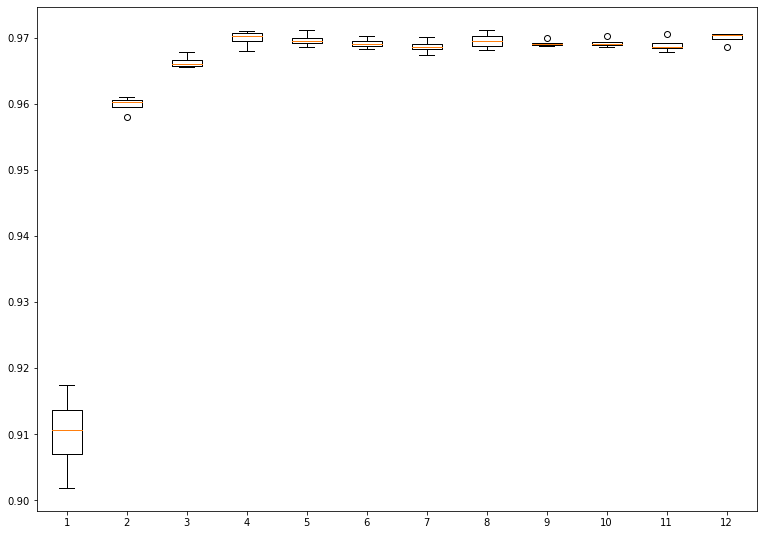

In [42]:
score_data =[ df_nystrom_cv[df_nystrom_cv.n_components == c][column_name_score_cv]
           for c in np.unique(df_nystrom_cv.n_components.to_list())
    ]

fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(score_data)
 
# show plot
plt.show()

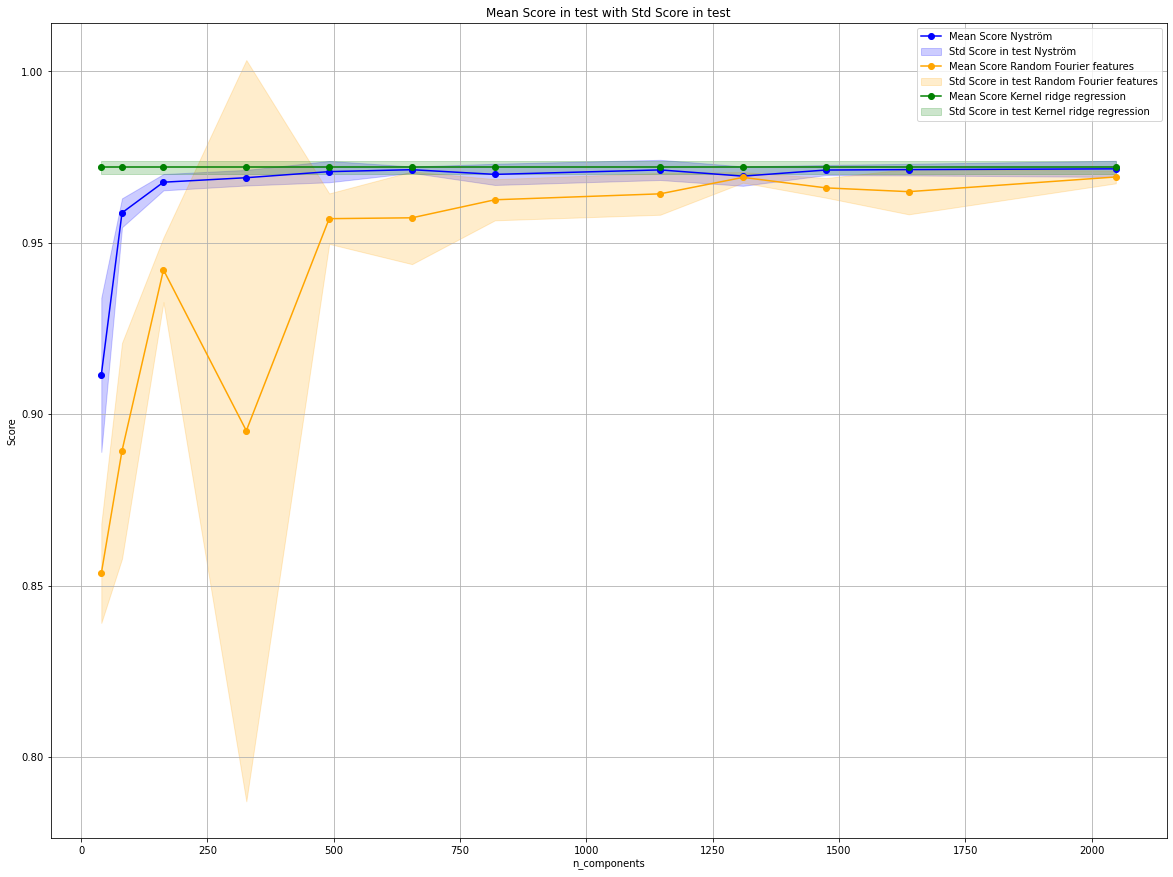

In [43]:
# Plot the graph
figsize=(20, 15)
plt.figure(figsize=figsize)

model = ['Nyström', 'Random Fourier features', 'Kernel ridge regression']
color = ['blue', 'orange', 'green']
for i,df in enumerate([df_nystrom_summary,df_fourier_random_features]):
# Extract data for plotting
    n_components = df[n_components_col_name]
    mean_score = df[mean_score_col_name]
    std_score = df[std_score_col_name]

    plt.plot(n_components, mean_score, label=f'Mean Score {model[i]}', color=color[i], marker='o')
    plt.fill_between(n_components, mean_score - std_score, mean_score + std_score, color=color[i], alpha=0.2, label=f'Std Score in test {model[i]}')

# cte values
i = 2
df = df_kernel_ridge_sumary
mean_score = np.array([ df[mean_score_col_name][0] for _ in n_components])
std_score = np.array([ df[std_score_col_name][0] for _ in n_components ])
plt.plot(n_components, mean_score, label=f'Mean Score {model[i]}', color=color[i], marker='o')
plt.fill_between(n_components, mean_score - std_score, mean_score + std_score, color=color[i], alpha=0.2, label=f'Std Score in test {model[i]}')


plt.xlabel('n_components')
plt.ylabel('Score')
plt.title('Mean Score in test with Std Score in test')
plt.legend()
plt.grid(True)
plt.show()


AttributeError: 'Figure' object has no attribute 'xlabel'

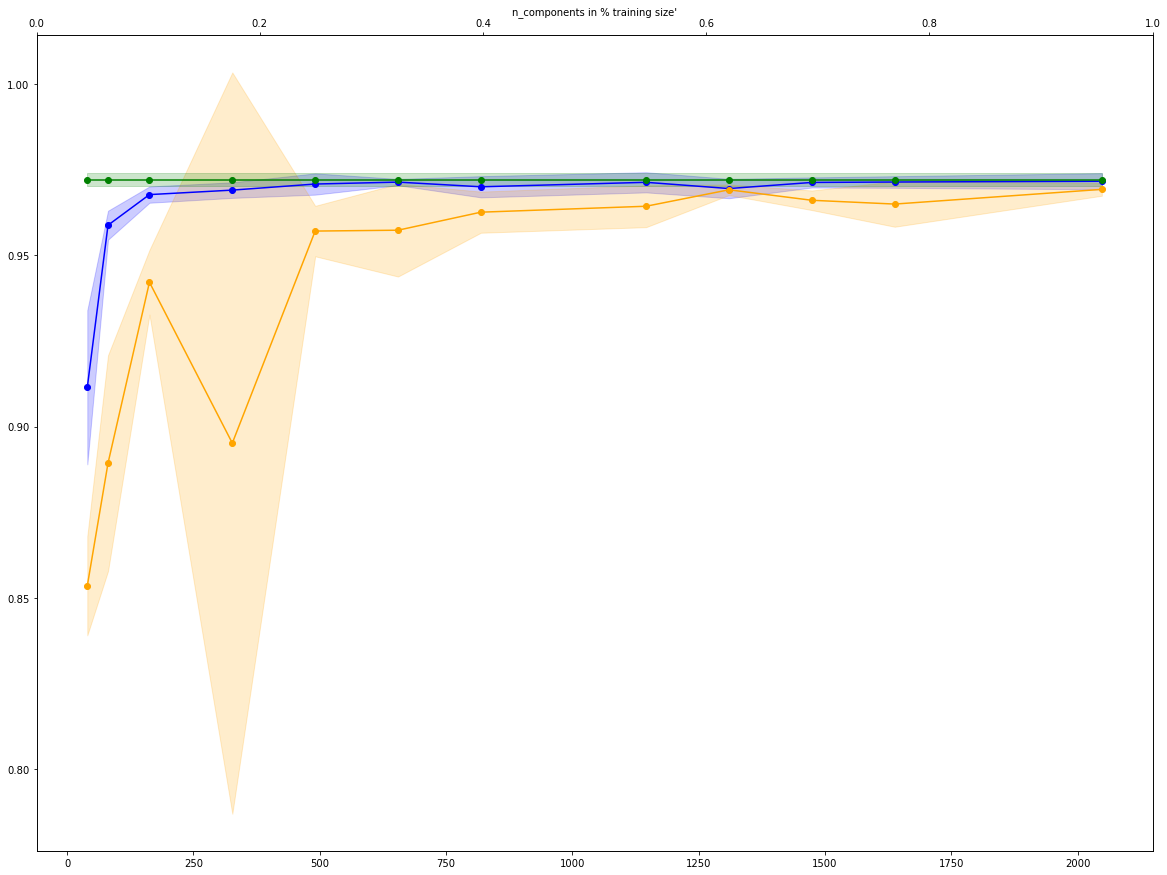

In [51]:
# Plot the graph
figsize=(20, 15)


fig = plt.figure(figsize=figsize)
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

model = ['Nyström', 'Random Fourier features', 'Kernel ridge regression']
color = ['blue', 'orange', 'green']
for i,df in enumerate([df_nystrom_summary,df_fourier_random_features]):
# Extract data for plotting
    n_components = df[n_components_col_name]
    mean_score = df[mean_score_col_name]
    std_score = df[std_score_col_name]

    ax1.plot(n_components, mean_score, label=f'Mean Score {model[i]}', color=color[i], marker='o')
    ax1.fill_between(n_components, mean_score - std_score, mean_score + std_score, color=color[i], alpha=0.2, label=f'Std Score in test {model[i]}')

# cte values
i = 2
df = df_kernel_ridge_sumary
mean_score = np.array([ df[mean_score_col_name][0] for _ in n_components])
std_score = np.array([ df[std_score_col_name][0] for _ in n_components ])
ax1.plot(n_components, mean_score, label=f'Mean Score {model[i]}', color=color[i], marker='o')
ax1.fill_between(n_components, mean_score - std_score, mean_score + std_score, color=color[i], alpha=0.2, label=f'Std Score in test {model[i]}')


ax2.plot(df_nystrom_summary[percent_col_name], np.ones(len(n_components))) # Create a dummy plot
ax2.cla()
ax2.set_xlabel(r"n_components in % training size'")

plt.xlabel('number of components')
plt.ylabel('Score')
plt.title('Mean Score in test with Std Score in test')
plt.legend()
plt.grid(True)
plt.show()


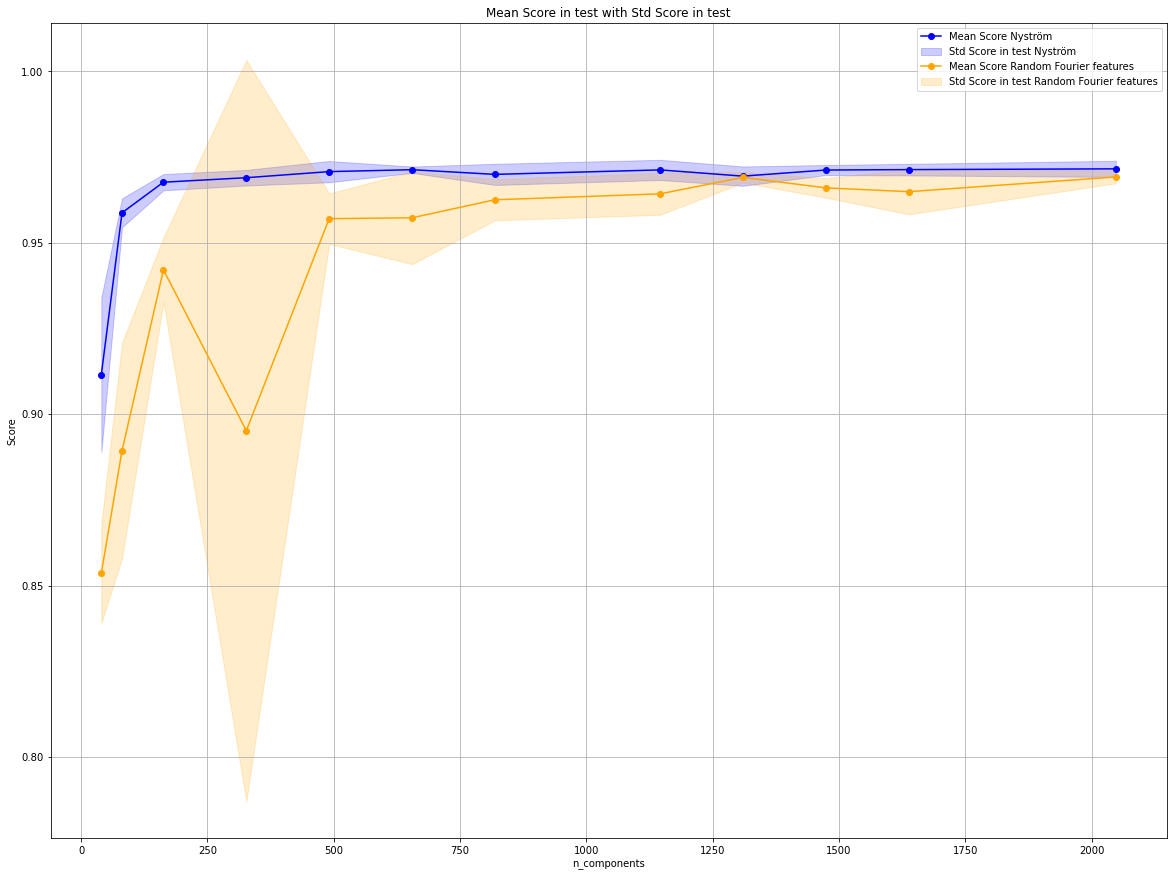

In [ ]:
# Plot the graph

plt.figure(figsize=figsize)

model = ['Nyström', 'Random Fourier features', 'Kernel ridge regression']
color = ['blue', 'orange', 'green']
for i,df in enumerate([df_nystrom_summary,df_fourier_random_features]):
# Extract data for plotting
    n_components = df[n_components_col_name]
    mean_score = df[mean_score_col_name]
    std_score = df[std_score_col_name]

    plt.plot(n_components, mean_score, label=f'Mean Score {model[i]}', color=color[i], marker='o')
    plt.fill_between(n_components, mean_score - std_score, mean_score + std_score, color=color[i], alpha=0.2, label=f'Std Score in test {model[i]}')



plt.xlabel('n_components')
plt.ylabel('Score')
plt.title('Mean Score in test with Std Score in test')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
8000 / 5

1600.0

In [ ]:
np.array([ df[mean_training_time_col_name][0] for _ in n_components]),np.array([ df[std_training_time_col_name][0] for _ in n_components ])

(array([0.00517547, 0.00517547, 0.00517547, 0.00517547, 0.00517547,
        0.00517547, 0.00517547, 0.00517547, 0.00517547, 0.00517547,
        0.00517547, 0.00517547]),
 array([0.00138931, 0.00138931, 0.00138931, 0.00138931, 0.00138931,
        0.00138931, 0.00138931, 0.00138931, 0.00138931, 0.00138931,
        0.00138931, 0.00138931]))

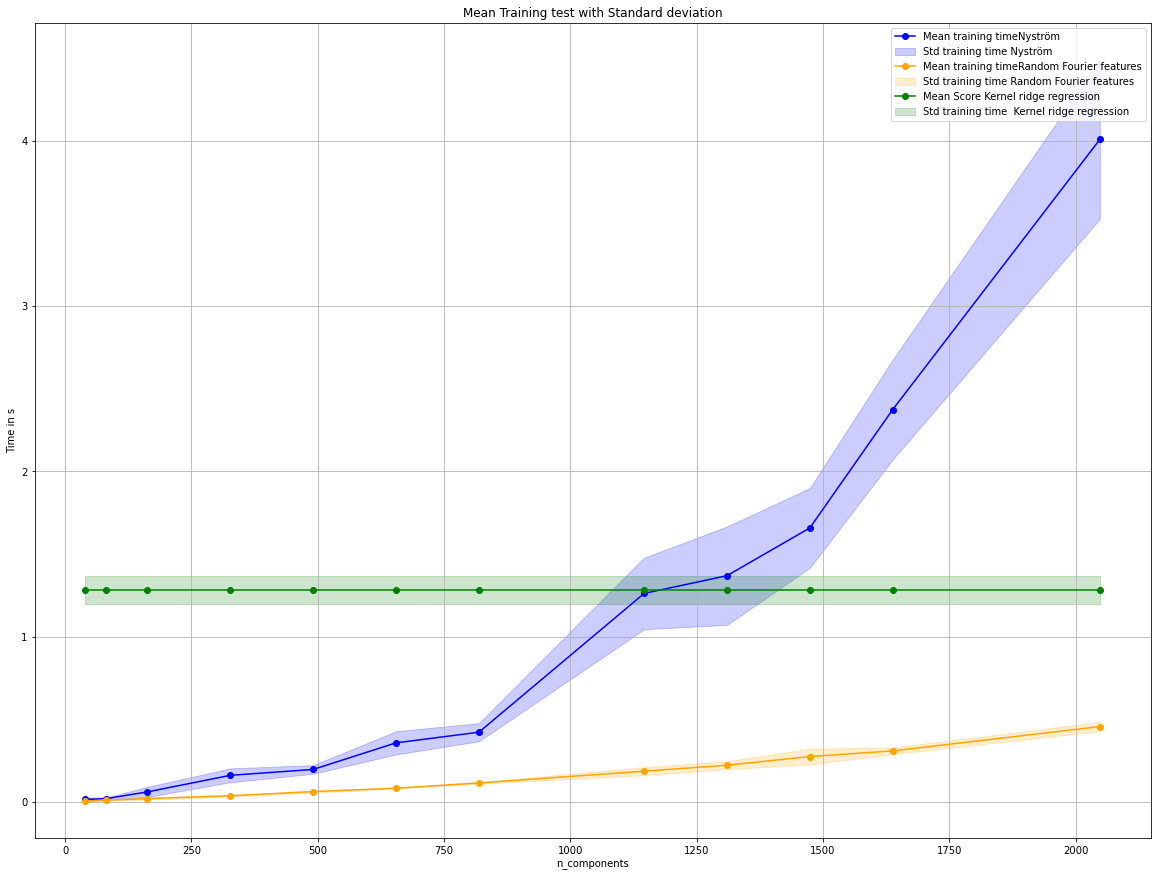

In [ ]:
# Plot the graph
plt.figure(figsize=figsize)

for i,df in enumerate([df_nystrom_summary,df_fourier_random_features]):
# Extract data for plotting
    n_components = df[n_components_col_name]
    mean_score = df[mean_training_time_col_name]
    std_score = df[std_training_time_col_name]

    plt.plot(n_components, mean_score, label=f'Mean training time{model[i]}', color=color[i], marker='o')
    plt.fill_between(n_components, mean_score - std_score, mean_score + std_score, color=color[i], alpha=0.2, label=f'Std training time {model[i]}')

# cte values
i = 2
df = df_kernel_ridge_sumary
mean_score = np.array([ df[mean_training_time_col_name][0] for _ in n_components])
std_score = np.array([ df[std_training_time_col_name][0] for _ in n_components ])
plt.plot(n_components, mean_score, label=f'Mean Score {model[i]}', color=color[i], marker='o')
plt.fill_between(n_components, mean_score - std_score, mean_score + std_score, color=color[i], alpha=0.2, label=f'Std training time  {model[i]}')


plt.xlabel('n_components')
plt.ylabel('Time in s')
plt.title('Mean Training test with Standard deviation')
plt.legend()
plt.grid(True)
plt.show()

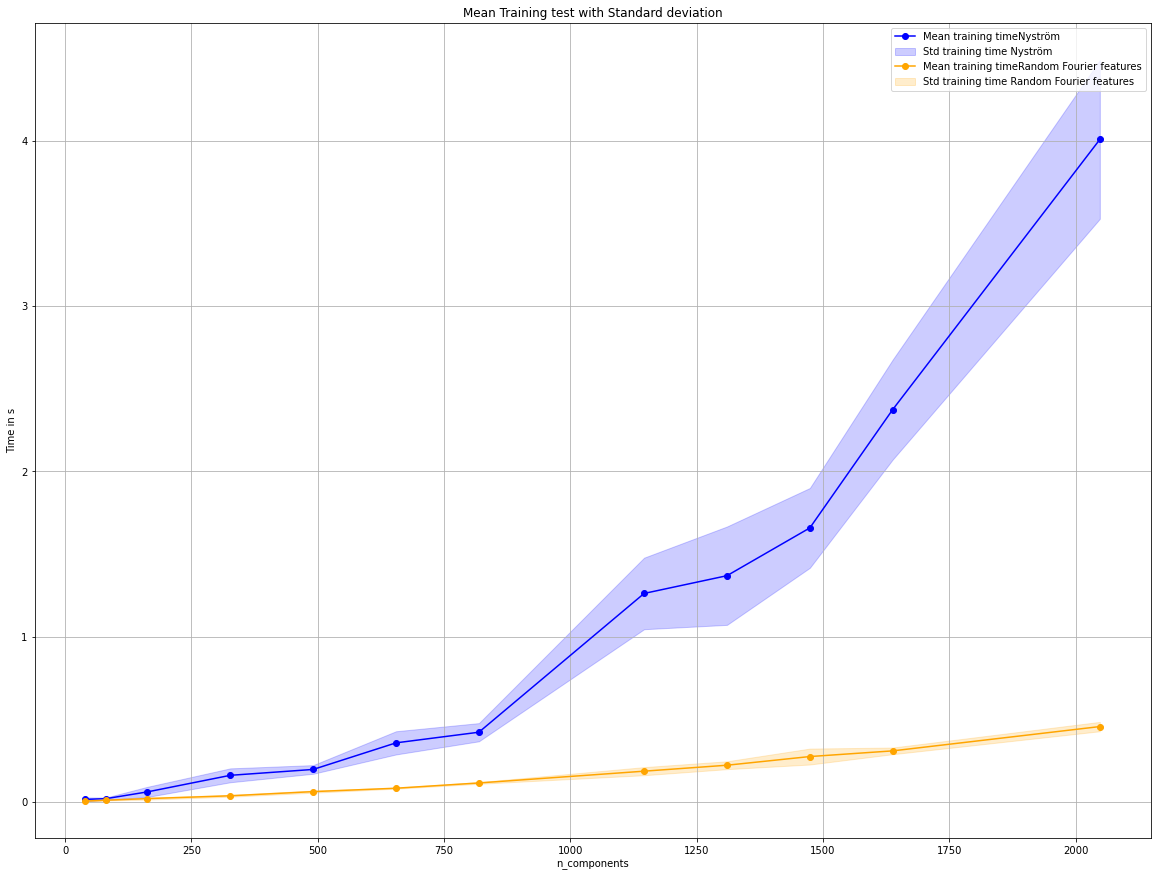

In [ ]:
# Plot the graph
plt.figure(figsize=figsize)

for i,df in enumerate([df_nystrom_summary,df_fourier_random_features]):
# Extract data for plotting
    n_components = df[n_components_col_name]
    mean_score = df[mean_training_time_col_name]
    std_score = df[std_training_time_col_name]

    plt.plot(n_components, mean_score, label=f'Mean training time{model[i]}', color=color[i], marker='o')
    plt.fill_between(n_components, mean_score - std_score, mean_score + std_score, color=color[i], alpha=0.2, label=f'Std training time {model[i]}')


plt.xlabel('n_components')
plt.ylabel('Time in s')
plt.title('Mean Training test with Standard deviation')
plt.legend()
plt.grid(True)
plt.show()

# Get nyström kernel colors

In [ ]:
 7.761021455128987e-11

7.761021455128987e-11